# Global Database of Events, Language, and Tone (GDELT)

In [14]:

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
import warnings
warnings.filterwarnings("ignore")

In [15]:
df = pd.read_csv("GDELT.csv").convert_dtypes()

### Rows and columns 

In [16]:
rows, columns = df.shape
print(f"Rows: {rows}, Columns: {columns}")

Rows: 58725, Columns: 58


In [17]:
df['date'] = pd.to_datetime(df['yearmon'], errors='coerce').dt.date
df = df.convert_dtypes()
df = df.set_index(['date']).sort_index()
df = df.drop(columns=['yearmon'])

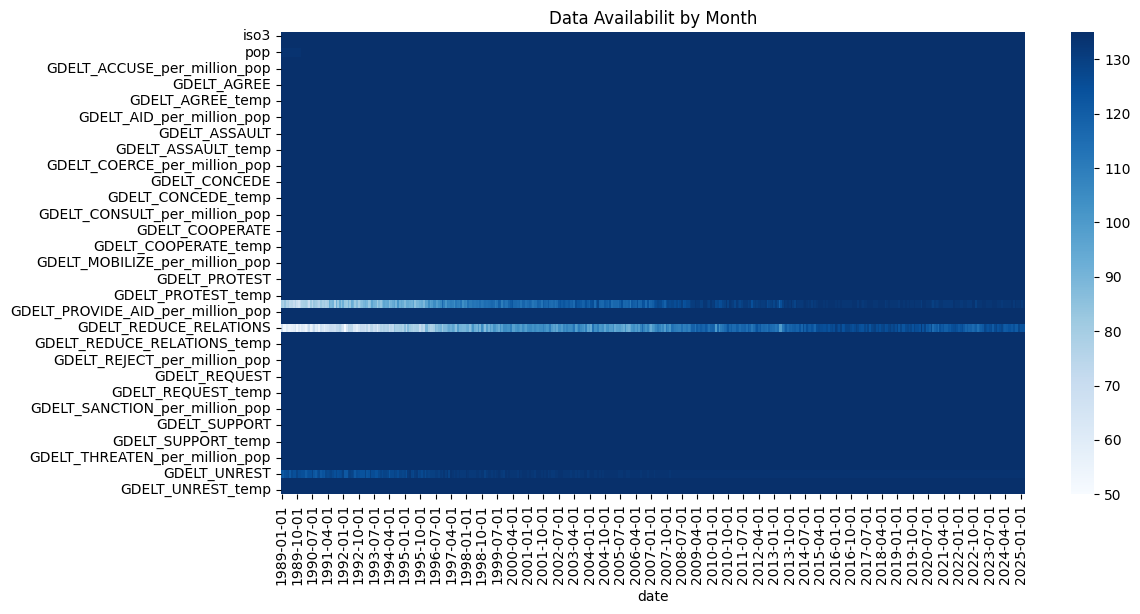

In [18]:
missing_by_month = df.groupby('date').count()
plt.figure(figsize=(12, 6))
sns.heatmap(missing_by_month.astype(float).T, cmap='Blues')
plt.title('Data Availabilit by Month')
plt.show()

### Sample data and features

In [19]:
df.tail().T

date,2025-03-01,2025-03-01,2025-03-01,2025-03-01,2025-03-01
iso3,BLZ,TUV,ZMB,TUN,ZWE
region_code,LAC,EAP,SSA,MNA,SSA
pop,411106.0,9816.0,20723965.0,12200431.0,16340822.0
GDELT_ACCUSE,74,0,77,37,337
GDELT_ACCUSE_per_million_pop,180.002238,0.0,3.715505,3.03268,20.623198
GDELT_ACCUSE_temp,180.002238,0.0,3.715505,3.03268,20.623198
GDELT_AGREE,47,2,56,17,151
GDELT_AGREE_per_million_pop,114.325746,203.748981,2.702186,1.393393,9.240661
GDELT_AGREE_temp,114.325746,203.748981,2.702186,1.393393,9.240661
GDELT_AID,38,3,57,22,170


In [20]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 58725 entries, 1989-01-01 to 2025-03-01
Data columns (total 57 columns):
 #   Column                                  Non-Null Count  Dtype  
---  ------                                  --------------  -----  
 0   iso3                                    58725 non-null  string 
 1   region_code                             58725 non-null  string 
 2   pop                                     58713 non-null  Float64
 3   GDELT_ACCUSE                            58725 non-null  Int64  
 4   GDELT_ACCUSE_per_million_pop            58725 non-null  Float64
 5   GDELT_ACCUSE_temp                       58725 non-null  Float64
 6   GDELT_AGREE                             58725 non-null  Int64  
 7   GDELT_AGREE_per_million_pop             58725 non-null  Float64
 8   GDELT_AGREE_temp                        58725 non-null  Float64
 9   GDELT_AID                               58725 non-null  Int64  
 10  GDELT_AID_per_million_pop               58725 non

### Descriptive statistics of categorical columns

In [21]:
df.describe(include='string').T

,count,unique,top,freq
iso3,58725,135,AFG,435
region_code,58725,6,SSA,20445


### Descriptive statistics of numerical columns

In [22]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
pop,58713.0,41259533.486332,153319719.021372,8662.0,2108617.0,8303151.0,25698326.0,1438069596.0
GDELT_ACCUSE,58725.0,123.058391,340.902274,0.0,7.0,33.0,97.0,6431.0
GDELT_ACCUSE_per_million_pop,58725.0,17.408291,60.506071,0.0,1.020291,3.608939,10.756999,1154.570932
GDELT_ACCUSE_temp,58725.0,17.585059,62.92319,0.0,1.019153,3.609328,10.777301,2551.743692
GDELT_AGREE,58725.0,75.678689,182.670154,0.0,7.0,26.0,69.0,3039.0
GDELT_AGREE_per_million_pop,58725.0,14.981033,57.875532,0.0,0.884598,2.761169,7.833372,1352.900452
GDELT_AGREE_temp,58725.0,15.116435,59.823348,0.0,0.883526,2.761599,7.839052,2646.252717
GDELT_AID,58725.0,53.309885,133.111139,0.0,3.0,14.0,46.0,2339.0
GDELT_AID_per_million_pop,58725.0,9.97317,41.055985,0.0,0.350261,1.539041,4.984963,1003.374989
GDELT_AID_temp,58725.0,10.109648,43.156528,0.0,0.350026,1.540083,4.997821,1855.28757


### Deatils of missing values in the features

In [23]:
total_rows = len(df)
missing_count = df.isnull().sum()
missing_percent = (missing_count / total_rows * 100).round(2)
missing_df = pd.DataFrame({'Missing Count': missing_count, 'Missing Percentage (%)': missing_percent})
missing_df = missing_df.sort_values(by='Missing Percentage (%)', ascending=False)
missing_df

,Missing Count,Missing Percentage (%)
GDELT_REDUCE_RELATIONS,13494,22.98
GDELT_PROVIDE_AID,7491,12.76
GDELT_UNREST,1226,2.09
pop,12,0.02
iso3,0,0.00
GDELT_ACCUSE_temp,0,0.00
region_code,0,0.00
GDELT_ACCUSE,0,0.00
GDELT_ACCUSE_per_million_pop,0,0.00
GDELT_AID,0,0.00


In [24]:
columns = missing_df[missing_df['Missing Percentage (%)'] < 70].index
df = df[columns]

numeric_df = df.select_dtypes(include=['number']).dropna()


In [25]:
missing_by_iso3 = df.groupby('iso3').count()
missing_by_month = df.groupby('date').count()

### Availability of data by country

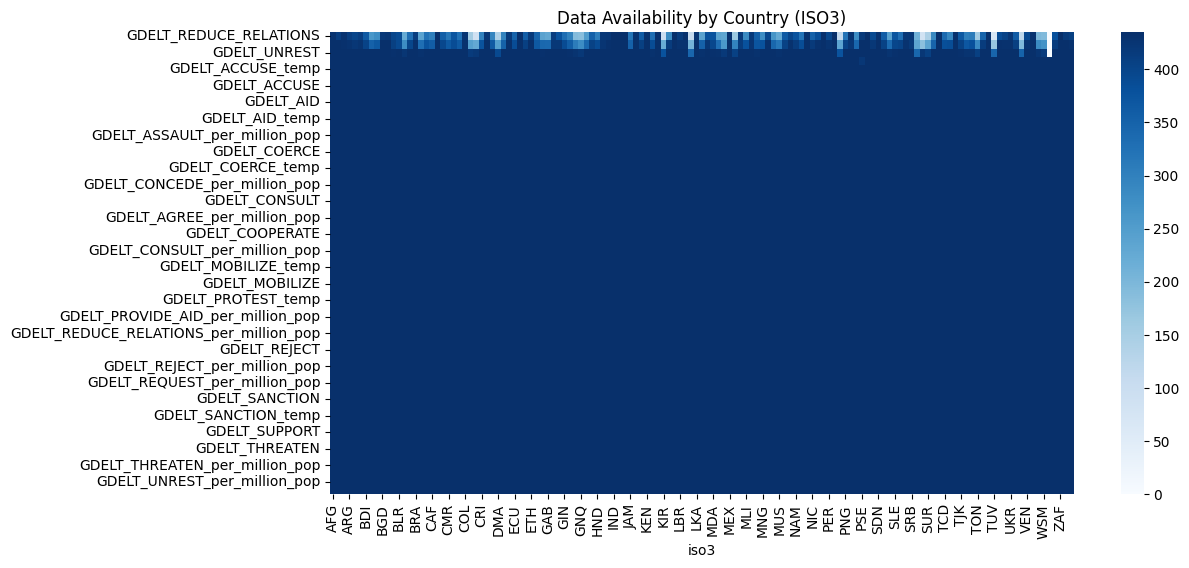

In [26]:
plt.figure(figsize=(12, 6))
sns.heatmap(missing_by_iso3.astype(float).T, cmap='Blues')
plt.title('Data Availability by Country (ISO3)')
plt.show()

### Availability of data by month

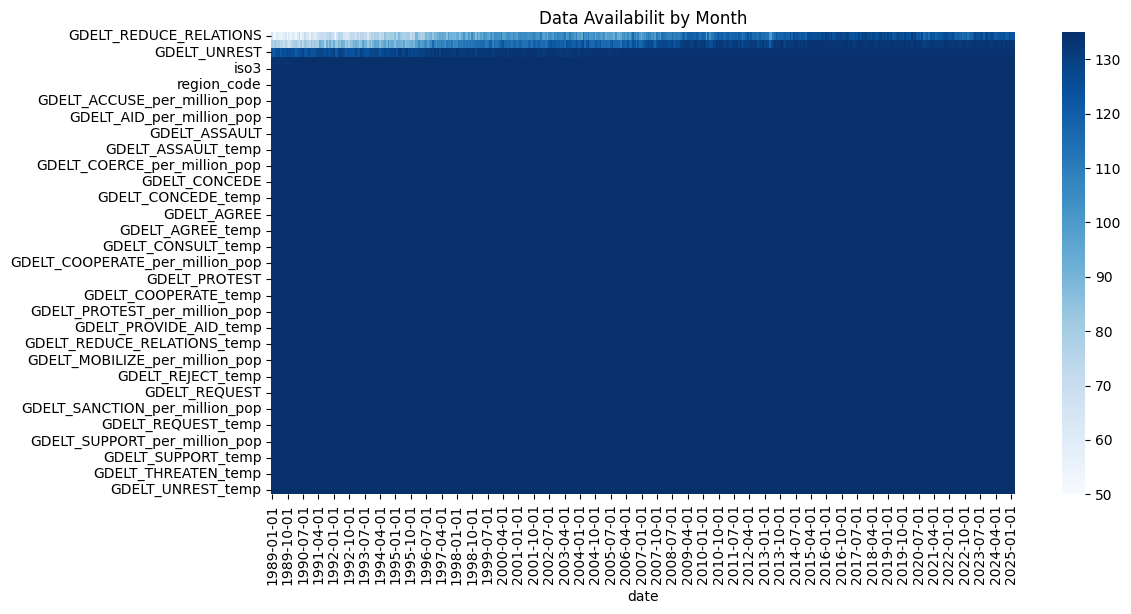

In [27]:
plt.figure(figsize=(12, 6))
sns.heatmap(missing_by_month.astype(float).T, cmap='Blues')
plt.title('Data Availabilit by Month')
plt.show()

In [28]:
#Correlation Matrix
correlation_matrix_df = numeric_df.corr(method='pearson')

In [29]:
numeric_df.columns

Index(['GDELT_REDUCE_RELATIONS', 'GDELT_PROVIDE_AID', 'GDELT_UNREST', 'pop',
       'GDELT_ACCUSE_temp', 'GDELT_ACCUSE', 'GDELT_ACCUSE_per_million_pop',
       'GDELT_AID', 'GDELT_AID_per_million_pop', 'GDELT_AID_temp',
       'GDELT_ASSAULT', 'GDELT_ASSAULT_per_million_pop', 'GDELT_ASSAULT_temp',
       'GDELT_COERCE', 'GDELT_COERCE_per_million_pop', 'GDELT_COERCE_temp',
       'GDELT_CONCEDE', 'GDELT_CONCEDE_per_million_pop', 'GDELT_CONCEDE_temp',
       'GDELT_CONSULT', 'GDELT_AGREE', 'GDELT_AGREE_per_million_pop',
       'GDELT_AGREE_temp', 'GDELT_COOPERATE', 'GDELT_CONSULT_temp',
       'GDELT_CONSULT_per_million_pop', 'GDELT_COOPERATE_per_million_pop',
       'GDELT_MOBILIZE_temp', 'GDELT_PROTEST', 'GDELT_MOBILIZE',
       'GDELT_COOPERATE_temp', 'GDELT_PROTEST_temp',
       'GDELT_PROTEST_per_million_pop', 'GDELT_PROVIDE_AID_per_million_pop',
       'GDELT_PROVIDE_AID_temp', 'GDELT_REDUCE_RELATIONS_per_million_pop',
       'GDELT_REDUCE_RELATIONS_temp', 'GDELT_REJECT',
       'G

### Correlation between the features

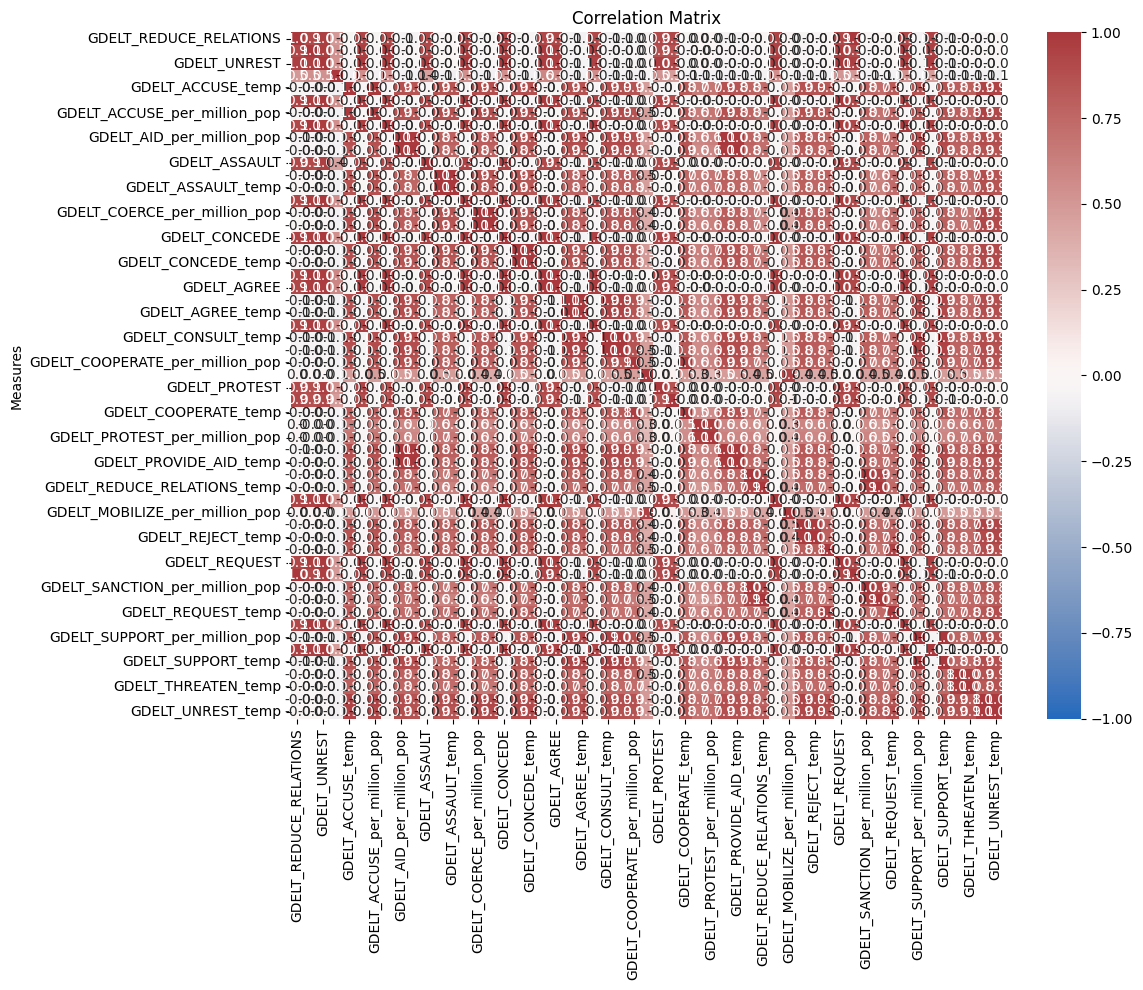

In [30]:
plt.figure(figsize=(12, 10))
sns.heatmap(correlation_matrix_df, cmap='vlag', vmin=-1, vmax=1, annot=True, fmt=".1f")
plt.title('Correlation Matrix')
plt.ylabel('Measures')
plt.tight_layout()
plt.show()

In [31]:
numeric_df.shape

(43947, 55)

### Principal Components Analysis of the features

In [32]:
scaler = StandardScaler()
X_scaled = scaler.fit_transform(numeric_df)
pca = PCA(n_components=0.75)
X_pca = pca.fit_transform(X_scaled)
n_components = X_pca.shape[1]
print(f"Number of components retained: {n_components}")
columns = [f'PC{i+1}' for i in range(n_components)]
print(f"Column names for PCA components: {columns}")

Number of components retained: 2
Column names for PCA components: ['PC1', 'PC2']


In [33]:
pca_df = pd.DataFrame(X_pca, index=numeric_df.index, columns=columns)

In [34]:
pca_correlation_matrix_df = pca_df.corr(method='pearson')

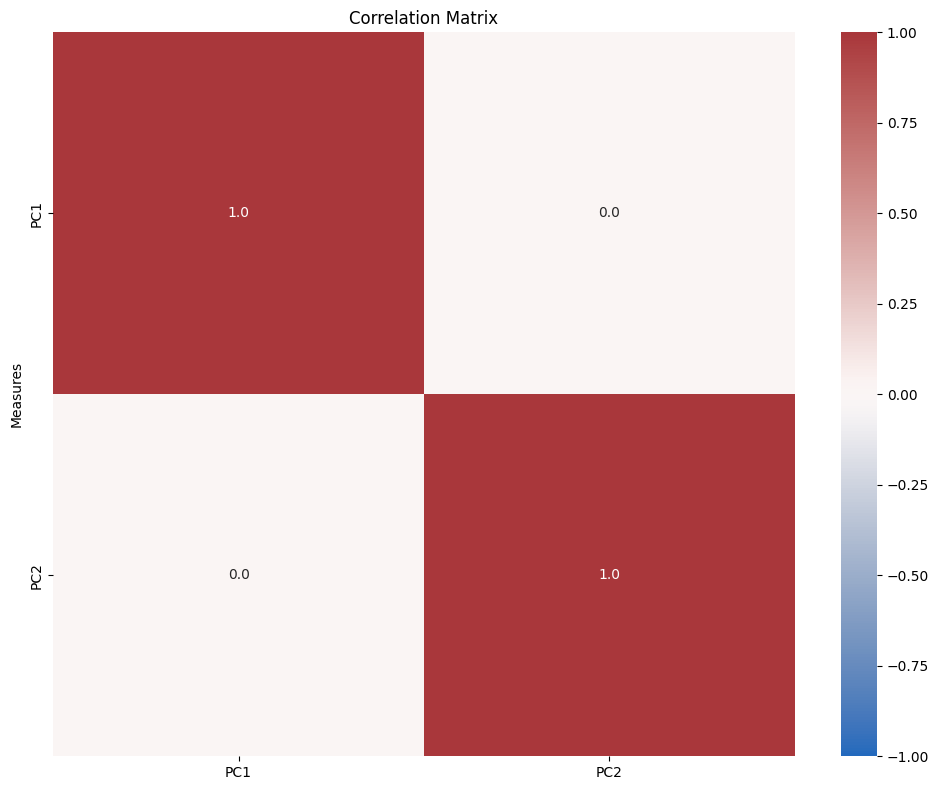

In [35]:
plt.figure(figsize=(10, 8))
sns.heatmap(pca_correlation_matrix_df, cmap='vlag', vmin=-1, vmax=1, annot=True, fmt=".1f")
plt.title('Correlation Matrix')
plt.ylabel('Measures')
plt.tight_layout()
plt.show()

### Explained Variance by Principal Component

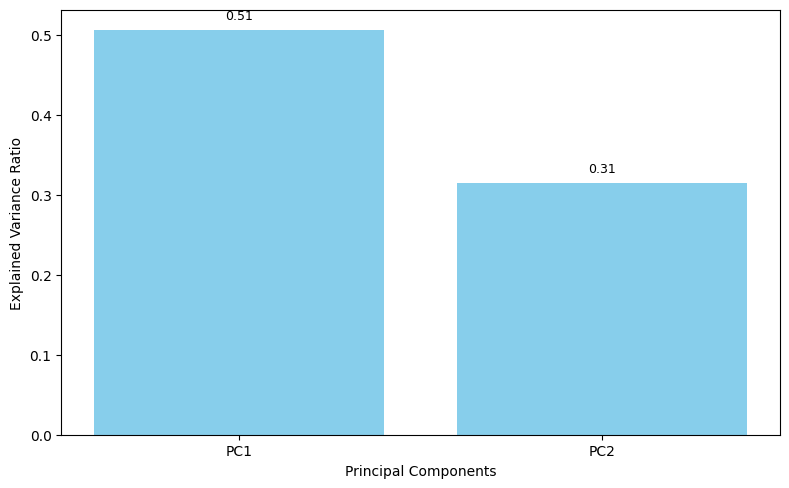

In [36]:
# Get explained variance ratios
explained_variance = pca.explained_variance_ratio_
components = np.arange(1, len(explained_variance) + 1)
labels = [f'PC{i}' for i in components]

# Plot bar chart
plt.figure(figsize=(8, 5))
bars = plt.bar(x=components, height=explained_variance, tick_label=labels, color='skyblue')

# Add value labels on top of each bar
for bar in bars:
    height = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2, height + 0.01, f"{height:.2f}",
             ha='center', va='bottom', fontsize=9)

plt.ylabel('Explained Variance Ratio')
plt.xlabel('Principal Components')
# plt.title('Explained Variance by Principal Component')
plt.tight_layout()
plt.show()

### Cumulative Explained Variance

Cumulative explained variance at component 2: 0.8208


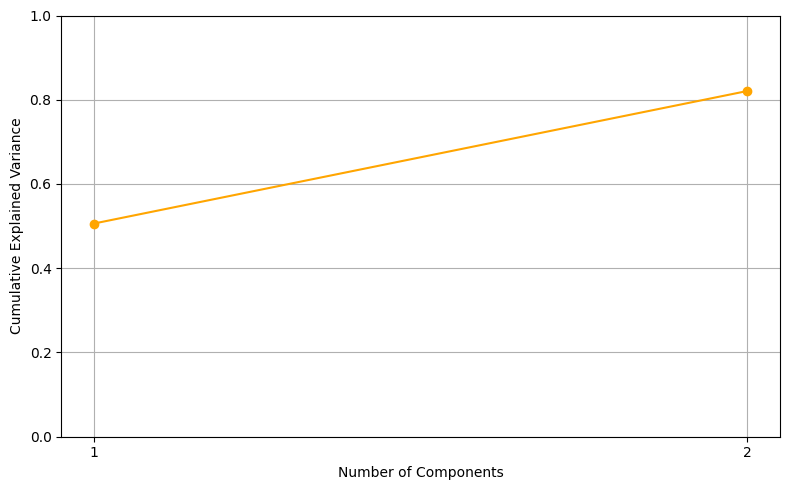

In [37]:
import numpy as np
import matplotlib.pyplot as plt

# Assuming `pca` has already been fitted
cumulative_variance = np.cumsum(pca.explained_variance_ratio_)

# Specify the component number (e.g., n = 4)
n = 2 # Change this to your desired component index
if n <= len(cumulative_variance):
    print(f"Cumulative explained variance at component {n}: {cumulative_variance[n-1]:.4f}")
else:
    print(f"Component {n} exceeds the total number of components ({len(cumulative_variance)}).")

# Plot the cumulative explained variance
plt.figure(figsize=(8, 5))
plt.plot(np.arange(1, len(cumulative_variance) + 1), cumulative_variance, marker='o', color='orange')
plt.xlabel('Number of Components')
plt.ylabel('Cumulative Explained Variance')
plt.xticks(np.arange(1, len(cumulative_variance) + 1, step=1))
plt.ylim(0, 1)
plt.grid(True)
plt.tight_layout()
plt.show()


In [38]:
feature_names = numeric_df.columns
components = pca.components_
loadings_df = pd.DataFrame(components.T, index=feature_names, columns=[f'PC{i+1}' for i in range(components.shape[0])])

### PCA Loadings Heatmap

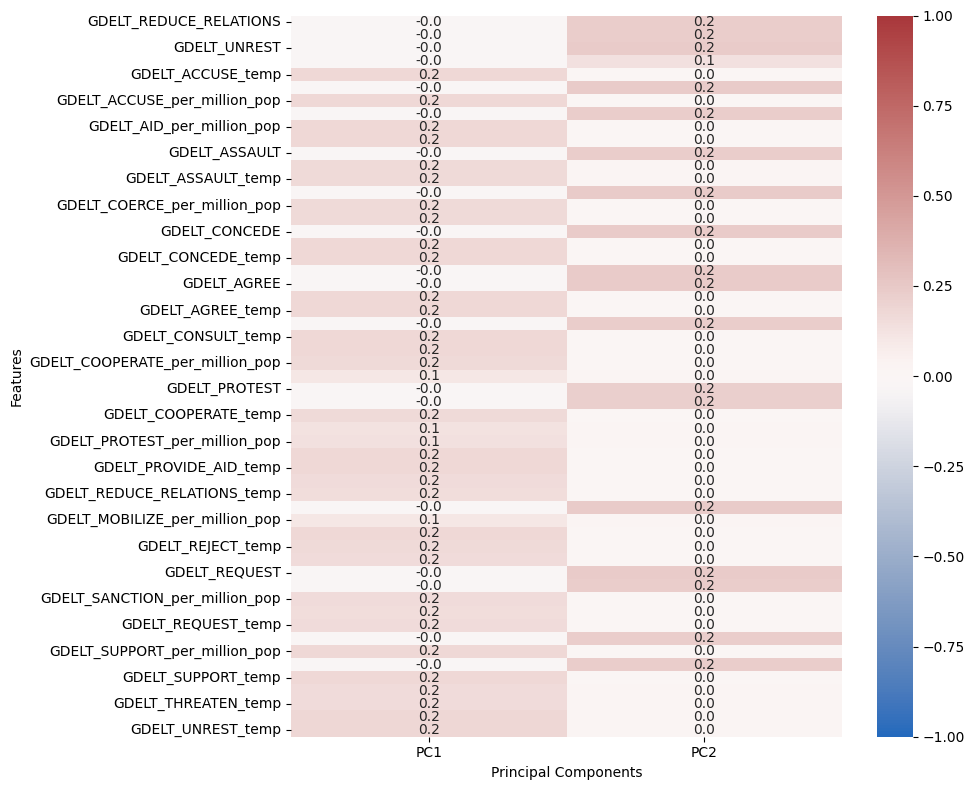

In [39]:
# create heatmap from loadings_df using sns
plt.figure(figsize=(10, 8))
sns.heatmap(loadings_df, cmap='vlag', vmin=-1, vmax=1, annot=True, fmt=".1f")
# plt.title('PCA Loadings Heatmap')
plt.xlabel('Principal Components')
plt.ylabel('Features')
plt.tight_layout()
plt.show()

In [40]:
# Print PCA loadings matrix as plain text
print("🔢 PCA Loadings Matrix:\n")
print(loadings_df.round(2))  # Round to 2 decimal places for readability


🔢 PCA Loadings Matrix:

                                         PC1   PC2
GDELT_REDUCE_RELATIONS                 -0.02  0.23
GDELT_PROVIDE_AID                      -0.02  0.23
GDELT_UNREST                           -0.02  0.24
pop                                    -0.02  0.13
GDELT_ACCUSE_temp                       0.18  0.01
GDELT_ACCUSE                           -0.02  0.24
GDELT_ACCUSE_per_million_pop            0.18  0.01
GDELT_AID                              -0.02  0.23
GDELT_AID_per_million_pop               0.18  0.01
GDELT_AID_temp                          0.17  0.01
GDELT_ASSAULT                          -0.02  0.23
GDELT_ASSAULT_per_million_pop           0.17  0.02
GDELT_ASSAULT_temp                      0.17  0.02
GDELT_COERCE                           -0.02  0.24
GDELT_COERCE_per_million_pop            0.17  0.01
GDELT_COERCE_temp                       0.17  0.01
GDELT_CONCEDE                          -0.02  0.24
GDELT_CONCEDE_per_million_pop           0.18  0.01
GDELT_C

## Physical Interpretation

### PC1- Normalized Violent & Reactive Events. Countries with high scores on PC1 likely have per capita surges in unrest, aid, assault, etc., over time

### PC2- Raw Conflict & Diplomatic Event Volume. Countries with large raw event counts (like large countries with higher media attention) will rank higher.